# Automatic Feature Selection

## Univariate Statistics

Univariate statistics compute the relationship between individual feature with the target and not each other features. The feature that have relationship with other features will be discarded.

In [29]:
# testing with load cancer
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# create noise features
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add the noise to data
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                    random_state=0, test_size=.5)
# select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform the test
X_train_selected = select.transform(X_train)

print("default features : ", X_train.shape)
print("selected features : ", X_train_selected.shape)

default features :  (284, 80)
selected features :  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0, 0.5, '()')

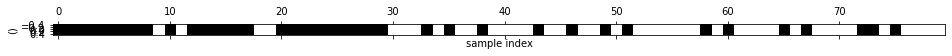

In [30]:
import matplotlib.pyplot as plt

# find out which features has been selected
# using get_support
mask = select.get_support()
print(mask)
# visualize the mask
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("sample index")
plt.ylabel(())

In [31]:
# inserting the selected features into LogisticRegression model
from sklearn.linear_model import LogisticRegression

# transform the test data
X_test_selected = select.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("score with all features {:.3f}".format(logreg.score(X_test, y_test)))
logreg.fit(X_train_selected, y_train)
print("score with selected features {:.3f}".format(logreg.score(X_test_selected, y_test)))


score with all features 0.919
score with selected features 0.909


## Model Based Feature Selection

Decision Tree based model provides _(feature\_importances\_)_ which encodes the importances of each feature and Linear base model provides have _coefficients_ to do the same thing. These feature could be viewed as feature selection as well as preprocessing 

In [32]:
# applying model feature selection with RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
            threshold='median')
# fit using breast cancer data
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("default features : ", X_train.shape)
print("selected features : ", X_train_l1.shape)

default features :  (284, 80)
selected features :  (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


Text(0, 0.5, '()')

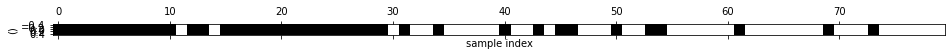

In [33]:
import matplotlib.pyplot as plt

# find out which features has been selected
# using get_support
mask = select.get_support()
print(mask)
# visualize the mask
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("sample index")
plt.ylabel(())

In [34]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score {:.3f}".format(score))

Test score 0.930


## Iterative Feature Selection

There are two methods first create a model with no feature and adding features until the stopping criteria or add all the features and discard one by one until stopping criteria. One of the implementations of this method is using _recursive feature elimination_ (_RFE_) which starts with all the features and discard the least importance.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


Text(0, 0.5, '()')

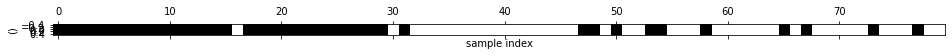

In [35]:
# create RFE
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
        n_features_to_select=40)

# fit the RFE
select.fit(X_train, y_train)

# find out which features has been selected
# using get_support
mask = select.get_support()
print(mask)
# visualize the mask
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("sample index")
plt.ylabel(())

In [36]:
# the book said the feature selection is better
# compared to the univariate and model-based
# but this method runs longer because the model
# was trained 40 times
# compare the result using LogisticRegression

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score {:.3f}".format(score))

Test score 0.930


In [37]:
# the RFE is also can be used to make predictions
print("RFE score {}".format(select.score(X_test, y_test)))

RFE score 0.9508771929824561
